# Hoja de Trabajo \# 3


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo de esta hoja de trabajo  es presentar al estudiante diferentes técnicas de transformación de variables numéricas. Éstas técnicas incluyen Feature Scaling, Feature Transformation y Feature Discretization.

También se busca que el estudiante practique la utilización de éstas técnicas con las librerías disponibles en el lenguaje Python.

## Importación de librerías y carga de los datos a varios pandas [DataFrames](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


Las librerías que importaremos para empezar son pandas y numpy para el manejo de los datos, y matplotlib, seaborn y plotly para la generación de visualizaciones. 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
#X, y = data.data, data.target

df = pd.DataFrame(data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df,data.target,shuffle=True,test_size=0.25,random_state=6011)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [ ]:
X_train = X_train.copy()

## Vistazo general al conjunto de datos y removiendo outliers

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 2243 to 10545
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.878851,28.617377,5.422452,1.094562,1423.447674,3.117972,35.623126,-119.559791
std,1.904728,12.606548,2.251056,0.436674,1139.642146,11.983021,2.139716,2.000876
min,0.499900,1.000000,0.846154,0.375000,3.000000,0.692308,32.540000,-124.350000
25%,2.568425,18.000000,4.436304,1.006263,788.000000,2.429049,33.930000,-121.772500
50%,3.544050,29.000000,5.238080,1.049180,1165.000000,2.817025,34.250000,-118.480000
75%,4.760525,37.000000,6.066949,1.099607,1725.000000,3.281420,37.710000,-118.000000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.470000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f135bb9cfd0>,
      dtype=object)

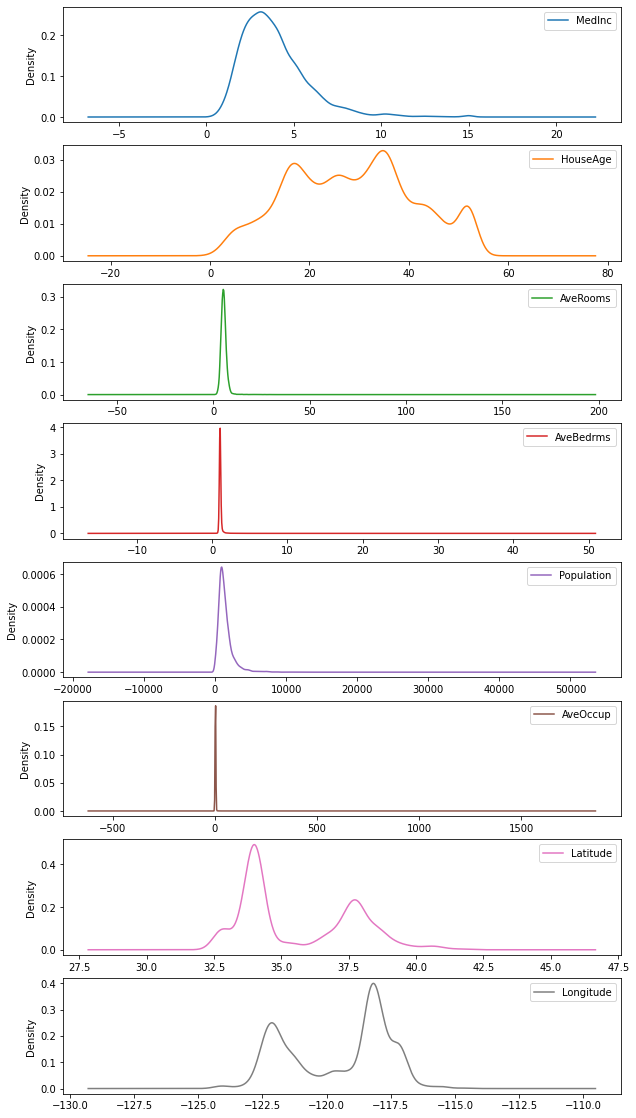

In [ ]:
X_train.plot.kde(subplots=True, figsize=(10,20), sharex=False)

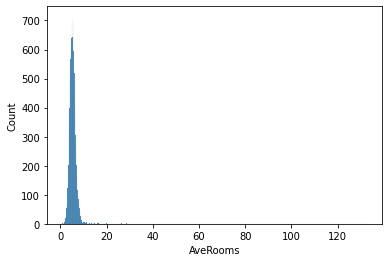

In [ ]:
sns.histplot(data=X_train, x='AveRooms')

In [ ]:
X_train['AveRooms'].quantile([0.1,0.5,0.90,0.95,0.99])

0.10     3.789708
0.50     5.238080
0.90     6.969890
0.95     7.656802
0.99    10.377530
Name: AveRooms, dtype: float64

In [ ]:
X_train_99 = X_train[X_train['AveRooms']<X_train['AveRooms'].quantile(0.99)].copy()

In [ ]:
X_train_99.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000
mean,3.875645,28.728352,5.284400,1.066905,1432.033279,3.122843,35.612976,-119.566380
std,1.896782,12.588834,1.242335,0.131166,1140.561433,12.042759,2.134051,2.000259
min,0.499900,1.000000,0.846154,0.375000,3.000000,0.750000,32.540000,-124.350000
25%,2.567000,18.000000,4.427136,1.005714,795.000000,2.432727,33.930000,-121.790000
50%,3.542600,29.000000,5.223169,1.048309,1171.000000,2.821530,34.240000,-118.480000
75%,4.760400,37.000000,6.032680,1.097436,1730.000000,3.286054,37.700000,-118.010000
max,15.000100,52.000000,10.375479,3.187970,35682.000000,1243.333333,41.950000,-114.560000


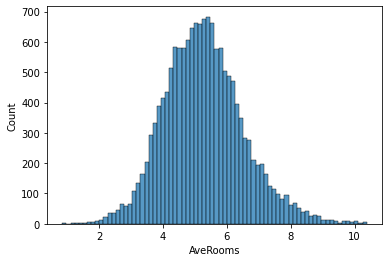

In [ ]:
sns.histplot(data=X_train_99, x='AveRooms')

## Feature Scaling
---

**Algunos modelos comúnmente utilizados**
  
|Nombre del algoritmo | Necesita escalamiento? |
|--|--|
| SVM, KNN, PCA, K-Means, Linear Regression, Logistic Regression, Linear Discriminant Analysis| $\checkmark$ |
| Naive Bayes, Tree-Based models | $\times$ |

* Asimetría afecta modelos PCA, entonces es recomendable utilizar Power Transformations para remover asimetría.

### Min-Max scaling

Supongamos que queremos re-escalar el atributo en el rango $(a,b)$  

Fórmula: ${x}' = a + \frac{x - \mathrm{min}(x)\times (b - a) }{\mathrm{max}(x) -\mathrm{min}(x)}$  

Éste método es muy sensitivo a los valores atípicos porque éstos afectan tanto min$(x)$ como max$(x)$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mn_scaler = MinMaxScaler()

In [ ]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_mm'
X train[trans_col_name]=mm_scaler.fit_transform(X_train[[col_name]])
#X_train99[trans_col_name]= mm_scaler.fit

SyntaxError: ignored

In [ ]:
sns.histplot(data=Xtrain_99,x=)

NameError: ignored

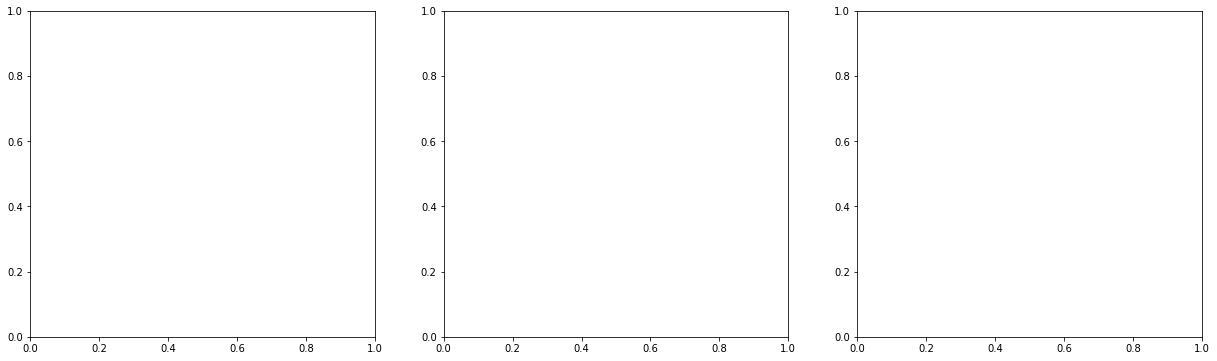

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0])
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=X_train_99, x=f'{trans_col_name}_2', ax=axes[2])

### Standardization or Normalization

Fórmula: ${z} = \frac{x - \mu }{\sigma}$ 

Donde $\mu$ es la media de $X$ y $\sigma$ es la desviación estándard.

Éste método también es sensitivo a valores atípicos porque afectan tanto $\mu$ como $\sigma$

In [ ]:
sd_scaler = StandardScaler()
sd_scaler2 = StandardScaler

### $l^2$ Normalization

Éste método trabaja sobre las filas del vector de atributos, no sobre columnas separadas. 

Supongamos que X[i][j] representa el valor del atributo $j$ en la instancia $i$.  
Fórmula para la norma $l^1$: $X[i][j] = \frac{X[i][j]}{\sum_{j=1|X[i][j]|}}$  
Fórmula para la norma $l^2$: $X[i][j] = \frac{X[i][j]}{\sqrt{\sum_{j=1}X[i][j]^2}}$  


In [ ]:
from sklearn.preprocessing import Normalizer  

In [ ]:
l1_scaler = Normalizer (norm='11')

### Robust Scaling

Supongamos que queremos escalar el atributo en el rango de cuantiles $(a, b)$

Fórmula: ${x}' = \frac{x - \mathrm{median}(x)}{\mathrm{quantile}(x,b) - \mathrm{quantile}(x,a)}$  

Este método es más robusto a valores atípicos.

## Feature Transformation
---

### Transformación Box-Cox

La transformación Box-Cox funciona únicamente para números estrictamente positivos. La transformación esta definida de la siguiente manera:

$x_i'(\lambda) = \left\{\begin{matrix}
 \frac{x_i^\lambda - 1}{\lambda}& if \lambda \neq 0\\ 
 log(\lambda)& if \lambda =  0
\end{matrix}\right.$  

### Transformación Yeo-Johnson

La transformación Yeo-Johnson trabaja tanto para valores positivos como negativos. La transformación esta definida de la siguiente manera:

$x_i(\lambda) = \left\{\begin{matrix}
\frac{[(x_i + 1)^{\lambda} -1]}{\lambda} & if \, \, \lambda\neq 0, x_i \geq  0 \\ 
ln(x_i + 1) & if \, \, \lambda =  0, x_i \geq  0\\ 
-\frac{[(-x_i + 1)^{2- \lambda} -1]}{2-\lambda} & if \, \, \lambda\neq 2, x_i <  0 \\ 
-ln(-x_i + 1) & if \, \, \lambda =  2, x_i <  0\\ 
\end{matrix}\right.$  


Usualmente los valores de $\lambda$  entre $[-5,5]$ son considerados y el valor óptimo que estabiliza la varianza y minimiza la asimetría es seleccionado utilizando MLE (Maximum Likelihood Estimate)

Lest try with another attribute

### Quantile transformation

## Feature Discretization
---

### Binarization

Convertir variables numéricas en respuestas binarias

### Uniform binning

Mapear variables numéricas en bloques uniformes

### *k*-means binning


Mapear variables numéricas en *k* bloques utilizando técnicas de agrupamiento o clustering

### Quantile binning

Maper variables numéricas en bloques con frecuencias uniformes
